In [2]:
from src.config import *
from src.preprocessing import *
from src.utils import load_data
import matplotlib.pyplot as plt


Let's now go with the same approach but refined; in particular, in this 2nd version of timestamp feature engineering I want to:

- Encode time features cyclical when it makes sense
- Encode other info (season , is_weekend) when it makes sense
- Manage NaN in another way 

---

### Time features engineering

In [3]:
news_df = load_data('../'+DEVELOPMENT_PATH)
prep = Preprocessor()
prep.df = news_df
prep.na_management()
prep.timestamp_management()
news_df = prep.df
news_df = news_df[news_df.year != 1970]

In [4]:
news_df

,source,title,article,page_rank,timestamp,y,dayofweek,month,hour,year
Id,,,,,,,,,,
0,AllAfrica.com,OPEC Boosts Nigeria&#39;s Oil Revenue By .82m Bpd,THE Organisation of Petroleum Exporting Countr...,5,2004-09-16 22:39:53,5,3,9,22,2004
1,Xinhua,Yearender: Mideast peace roadmap reaches dead-...,Looking back at the major events that took pla...,5,2004-12-17 19:01:14,0,4,12,19,2004
2,Yahoo,Battleground Dispatches for Oct. 5 \\n (CQP...,CQPolitics.com - Here are today's Battleground...,5,2006-10-05 18:42:29,0,3,10,18,2006
4,Yahoo,High tech German train crash kills at least on...,"<p><a href=""http://us.rd.yahoo.com/dailynews/r...",5,2006-09-22 17:28:57,0,4,9,17,2006
5,Syfy.com,Indian connections at this year's Oscars,India's official entry for this year's Oscars ...,5,2008-01-24 10:32:48,3,3,1,10,2008
...,...,...,...,...,...,...,...,...,...,...
79985,CNN,Parents protest radio ID tags for students,NaN,5,2005-02-11 04:34:15,5,4,2,4,2005
79990,Reuters,Bali breakthrough launches historic climate talks,"NUSA DUA, Indonesia (Reuters) - Nearly 200 nat...",5,2007-12-15 13:19:48,5,5,12,13,2007
79991,RedNova,LEDs Move Into Home Lighting Market,"By MARK JEWELL EVERETT, Mass. - Joey Nicotera...",4,2007-06-25 07:08:21,2,0,6,7,2007


In [5]:
sorted(news_df['y'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6)]

In [6]:
monthly_rate = news_df.groupby("month")["y"].mean().reset_index()

In [7]:
monthly_rate

,month,y
0,1,2.170716
1,2,2.088222
2,3,1.948448
3,5,2.023126
4,6,2.041485
5,7,2.058786
6,8,2.211644
7,9,2.113703
8,10,2.398237
9,11,2.524436


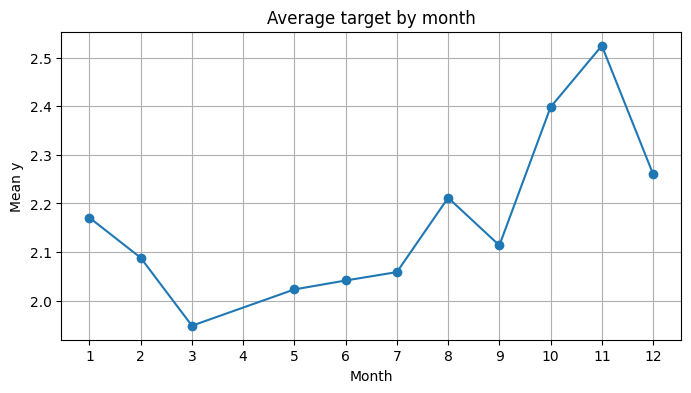

In [8]:
plt.figure(figsize=(8,4))
plt.plot(monthly_rate["month"], monthly_rate["y"], marker="o")
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Mean y")
plt.title("Average target by month")
plt.grid(True)
plt.show()


This chart show that a cyclical encoding of the month can be a better solution since the effect of the month on the label seems continuous and cyclical

In [9]:
monthly_rate_by_year = news_df.groupby(["year", "month"])["y"].mean().reset_index()
monthly_rate_by_year

,year,month,y
0,2004,8,2.469743
1,2004,9,2.591781
2,2004,10,2.719199
3,2004,11,2.747082
4,2004,12,2.617106
5,2005,1,1.991820
6,2005,2,2.117647
7,2006,5,1.604478
8,2006,6,1.774359
9,2006,7,1.695035


In [10]:
monthly_rate_by_year = monthly_rate_by_year.drop(0)

In [11]:
monthly_rate_by_year

,year,month,y
1,2004,9,2.591781
2,2004,10,2.719199
3,2004,11,2.747082
4,2004,12,2.617106
5,2005,1,1.991820
6,2005,2,2.117647
7,2006,5,1.604478
8,2006,6,1.774359
9,2006,7,1.695035
10,2006,8,1.845361


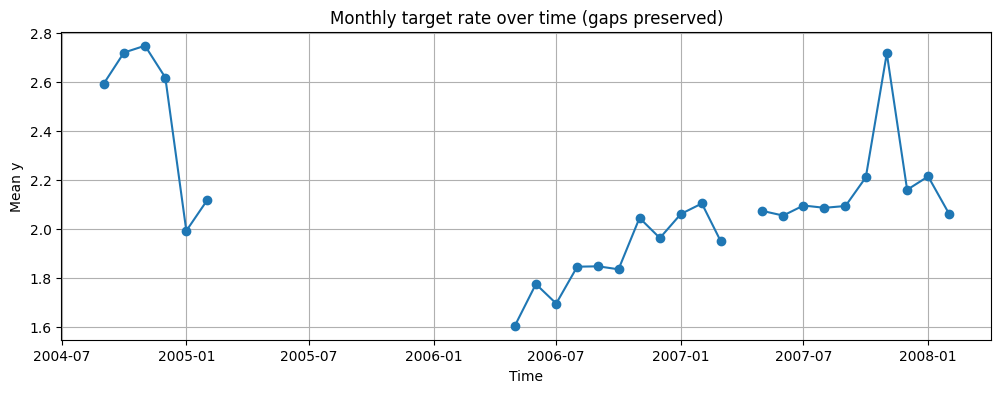

In [12]:
# 1) assicurati che monthly_rate_by_year contenga year, month, y
monthly_rate_by_year = (
    news_df.groupby(["year", "month"])["y"]
    .mean()
    .reset_index()
).drop(0)

# 2) crea una colonna "date" mensile
monthly_rate_by_year["date"] = pd.to_datetime(
    dict(year=monthly_rate_by_year["year"], month=monthly_rate_by_year["month"], day=1)
)

# 3) crea indice mensile completo tra min e max
full_idx = pd.date_range(
    monthly_rate_by_year["date"].min(),
    monthly_rate_by_year["date"].max(),
    freq="MS"
)

# 4) reindex sulla timeline completa
ts = (
    monthly_rate_by_year.set_index("date")["y"]
    .reindex(full_idx)
)

# 5) plot: gaps visibili (consigliato)
plt.figure(figsize=(12,4))
plt.plot(ts.index, ts.values, marker="o")
plt.xlabel("Time")
plt.ylabel("Mean y")
plt.title("Monthly target rate over time (gaps preserved)")
plt.grid(True)
plt.show()


Due to the presence of several missing months, the temporal evolution of the target is noisy and does not allow for a reliable time-series interpretation. However, the behavior remains compatible with a smooth monthly seasonal effect.

So, in the end, due to the fact that month belonging to the same seasons don't show a similar trend and, on the other end, months seems to look like important factor in the label in a continuous way, I will not encode the season (note also that can be in a certain way redundant) but I change the month encoding into a cyclical one.



In [13]:
news_df["month"].min(), news_df["month"].max(), news_df["month"].isna().sum()


(np.int32(1), np.int32(12), np.int64(0))

In [ ]:
import numpy as np

news_df["month_sin"] = np.sin(2 * np.pi * news_df["month"] / 12)
news_df["month_cos"] = np.cos(2 * np.pi * news_df["month"] / 12)


/tmp/ipykernel_17372/21964510.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  news_df.loc["month_sin"] = np.sin(2 * np.pi * news_df["month"] / 12)
/tmp/ipykernel_17372/21964510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df.loc["month_sin"] = np.sin(2 * np.pi * news_df["month"] / 12)
/tmp/ipykernel_17372/21964510.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old

---

Now, let's perform the same analysis on hour

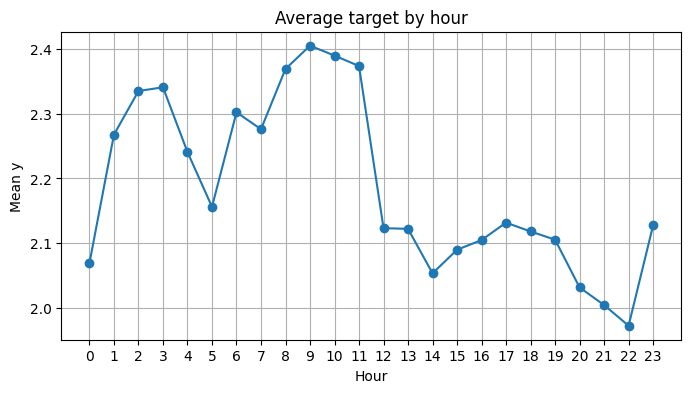

In [16]:
hourly_rate = news_df.groupby("hour")["y"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(hourly_rate["hour"], hourly_rate["y"], marker="o")
plt.xticks(range(0, 24))
plt.xlabel("Hour")
plt.ylabel("Mean y")
plt.title("Average target by hour")
plt.grid(True)
plt.show()


In [23]:
hourly_by_y = (
    news_df
    .groupby(["y", "hour"])
    .size()
    .reset_index(name="count")
)

hourly_by_y["prop"] = (
    hourly_by_y["count"]
    / hourly_by_y.groupby("y")["count"].transform("sum")
)



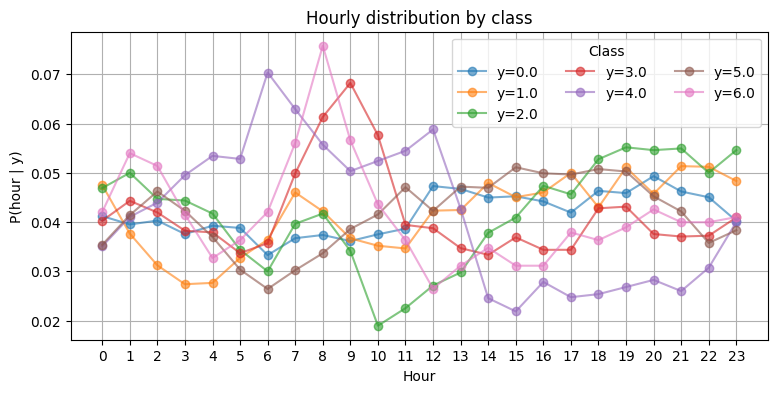

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))


for cls, df_c in hourly_by_y.groupby("y"):
    df_c = df_c.sort_values("hour")
    plt.plot(
        df_c["hour"],
        df_c["prop"],
        marker="o",
        alpha=0.6,
        label=f"y={cls}"
    )

plt.xticks(range(0,24))
plt.xlabel("Hour")
plt.ylabel("P(hour | y)")
plt.title("Hourly distribution by class")
plt.grid(True)
plt.legend(title="Class", ncol=3)

plt.show()


Also year it's quite evident the cyclical pattern


In [26]:
news_df["hour_sin"] = np.sin(2*np.pi*news_df["hour"] / 24)
news_df["hour_cos"] = np.cos(2*np.pi*news_df["hour"] / 24)


/tmp/ipykernel_17372/937939895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df["hour_sin"] = np.sin(2*np.pi*news_df["hour"] / 24)
/tmp/ipykernel_17372/937939895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df["hour_cos"] = np.cos(2*np.pi*news_df["hour"] / 24)


---

Let's continue also with the day

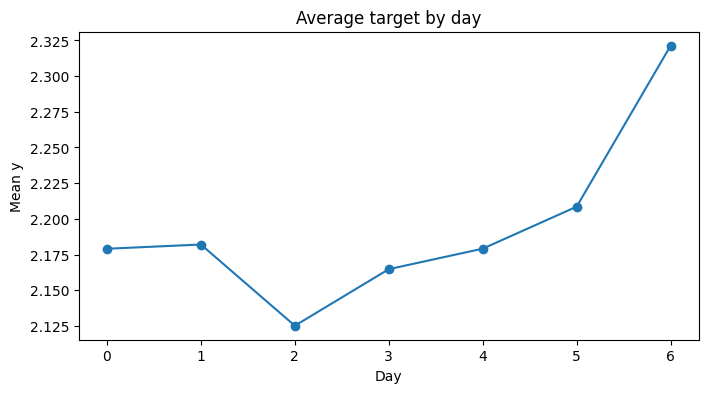

In [9]:
daily_rate = news_df.groupby("dayofweek")["y"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(daily_rate["dayofweek"], daily_rate["y"], marker="o")
plt.xticks(range(0, 7))
plt.xlabel("Day")
plt.ylabel("Mean y")
plt.title("Average target by day")
plt.show()


Here no cyclical pattern at all but it seems like a spike on the weekend. I procede with encoding is_weekend binary feautre

In [15]:
news_df['dayofweek'].max(), news_df['dayofweek'].min()

(np.int32(6), np.int32(0))

In [20]:
news_df['isweekend'] = news_df['dayofweek'].isin([5, 6])

/tmp/ipykernel_17750/265472613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['isweekend'] = news_df['dayofweek'].isin([5, 6])


In [21]:
news_df.groupby("isweekend")["y"].mean()


isweekend
False    2.165726
True     2.261535
Name: y, dtype: float64

---

With these new set of fetures I decide to manage NaN by putting null values in all timestamp features (only for year -1) and, due to the fact that there are lot of missing (~33%) I add another col, timestamp_missing